

# Project: Investigate a Dataset (IMDB Movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), the movies are in different languages and centuries. it is contains 20 attributes they are budget, genres,	homepage, id, keywords, original_language, original_title, overview, popularity, production_companies, production_countries, release_date, revenue, runtime, spoken_languages, status, tagline, title, vote_average and vote_count.

>Does the amount of budget affect people's rating?
>Are English movies more profitable than other languages movies ?
>Is there a huge transformation in movies revenues between the last two centuries?



In [49]:
# import the packages 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [50]:
def check_nullvalues (dataframe):
    total_null = str(dataframe.isnull().sum().any())
    null_values = str(dataframe.isnull().sum().any)
    return "the totall null values in the dataframe is "+total_null+"\n the null values in each column"+null_values

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, perform some operation: 1) load data 2) check for datatypes and missing values and some other informations and the other cleaning operation it is depend on the question.

### General Properties

In [51]:
# load the dataset and view few lines.
df = pd.read_csv('tmdb_5000_movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [52]:
# datatypes for all the columns 
df.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [53]:
# view some information about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [54]:
# view missing values in all columns 
temp = check_nullvalues(df)
print(temp)

the totall null values in the dataframe is True
 the null values in each column<bound method Series.any of budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64>



### Data Cleaning 

> In this section of report, some clean operations we need , and leave the other clean operations that depend on the  kind of questions. 
### Remove unnecessary columns

In [55]:
# Drop the unnecessary columns that we don't need and do not have any null values that maybe affect the analysis.
df.drop(['genres','keywords','popularity','production_companies','production_countries','status'], axis=1 , inplace = True)

In [56]:
# check the last operation
df.head(1)

,budget,homepage,id,original_language,original_title,overview,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count
0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,Avatar,7.2,11800


### Check the missing values

In [57]:
# check if there are any missing values we must remove.
temp = check_nullvalues(df)
print(temp)

the totall null values in the dataframe is True
 the null values in each column<bound method Series.any of budget                  0
homepage             3091
id                      0
original_language       0
original_title          0
overview                3
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
tagline               844
title                   0
vote_average            0
vote_count              0
dtype: int64>


### Check the duplicated rows

In [58]:
# check the duplicated rows.
sum(df.duplicated())

0

<a id='eda'></a>
## Exploratory Data Analysis


### Does the amount of budget affect people's rating?

> Maybe Some movies production companies are asking whether expensive movies in terms of photography and techniques used in the movies and put a lot of money to produce the moveis admire the viewers more because the techniques used or not ? we will perform some analysis in the next cells to see whether affect or ont.


>In the next cell, some of the clean operations and filter to the data needed.

In [59]:
# clean the data from the zero values 
data_sample = df.query('budget != 0')
data_sample = data_sample.query('vote_average != 0')
# filter the data with the needed columns 
data_sample = data_sample.iloc[: ,np.r_[ :1 , 12:13]]


>The visualization of the analysis.

Text(0.5,1,'Relationship between budget and voting')

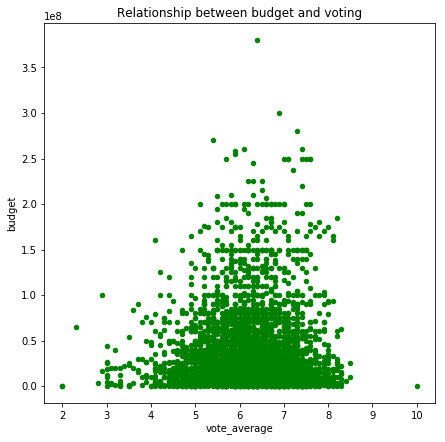

In [60]:
# use scatter visualization to view the data 
data_sample.plot(x='vote_average',y='budget',kind='scatter',color = 'g',figsize=(7,7))
plt.title("Relationship between budget and voting")


### Are English movies more profitable than other languages movies ?
> In fact, most people from all regions prefer English movies more than other language movies and the likelihood of this fact is maybe true because English movies are more popular but we will confirm this with some statistics and analysis.

> In the next cell, some of the clean operations and filter to the data needed.

In [61]:
# remove all zero values in budget and revenue to clean our data.
profit_sample = df.query('budget != 0')
profit_sample = profit_sample.query('revenue != 0') 

# create column for profit 
profit_sample['profit'] = profit_sample['revenue']-profit_sample['budget']

# filter the data to just the english movies  
en_movies =profit_sample.query('original_language == "en"')
# cheak if all the movies are english
en_movies['original_language'].unique()
# drop the original_language columns beacuse it is unnecessary now.
# en_movies.drop('original_language',axis=1,inplace=True)
en_profit = en_movies['profit']

# filter the data from the english movies 
other_movies = profit_sample.query('original_language != "en"')
# cheak if it not contain english movies
other_movies['original_language'].unique()
# drop the original_language columns beacuse it is unnecessary now.
#other_movies.drop('original_language',axis=1,inplace=True)
other_profit = other_movies['profit']

> In the next two cells the visualization of the analysis.

Text(0.5,1,'English movies profit')

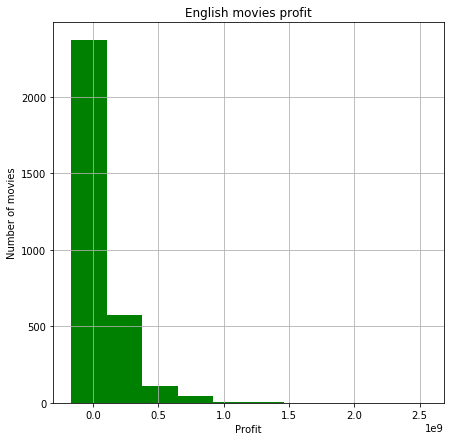

In [62]:
# create a histogram of English movies profit
plt.figure(figsize=(7,7))
en_profit.hist(color='g') 
plt.xlabel("Profit")
plt.ylabel("Number of movies")
plt.title("English movies profit")

Text(0.5,1,'Other languages movies profit')

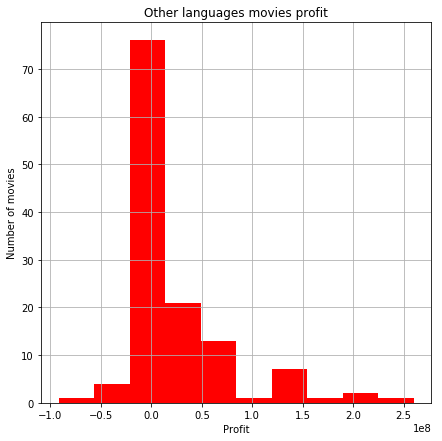

In [63]:
# create a histogram of Other languages movies profit
plt.figure(figsize=(7,7))
other_profit.hist(color='r') 
plt.xlabel("Profit")
plt.ylabel("Number of movies")
plt.title("Other languages movies profit")

### Is there a huge transformation in movies revenues between the last two centuries?

>These days, the electronic devices such as television and smartphones and also websites that provides movies and make the way to get and see it easier than the previous years, so people now become more interesting in movies and sharing it with others.
In this case, does the movies product companies  earn more money and incressing their revenue these years?

> In the next cell, some of the clean operations and filter to the data needed.

In [64]:
# clean the data 
sample = df.query('revenue != 0') 
sample = sample.query('release_date != 0')
sample = sample.dropna()
# check if there are any null values
temp = check_nullvalues(sample)
print(temp)
# filter the data with just movies that release in the 20 century 
cen20_sample=sample.query("'2000-12-31' > release_date > '1901-01-01'")
# filter the data with just movies that release in the 21 century 
cen21_sample=sample.query("'2100-12-31' > release_date > '2001-01-01'")


the totall null values in the dataframe is False
 the null values in each column<bound method Series.any of budget               0
homepage             0
id                   0
original_language    0
original_title       0
overview             0
release_date         0
revenue              0
runtime              0
spoken_languages     0
tagline              0
title                0
vote_average         0
vote_count           0
dtype: int64>


> the bar chart of the analysis.

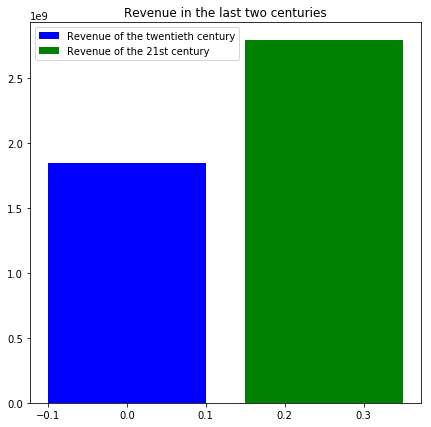

In [65]:
# filter the data with the needed columns
cen20_revenue = cen20_sample['revenue']
cen21_revenue = cen21_sample['revenue']
# bar chart for the two revenue that in the 20 and 21 centuries
plt.figure(figsize=(7,7))
plt.bar(0.00,cen20_revenue , color = 'b', width = 0.20 , label='Revenue of the twentieth century')
plt.bar(0.25, cen21_revenue, color = 'g', width = 0.20, label = 'Revenue of the 21st century')
plt.title('Revenue in the last two centuries')
plt.legend()

<a id='conclusions'></a>
## Conclusions


### in question1 ( Does the amount of budget affect people's rating? )

> The amount of budget does not affect very much the voting because
from the visualization it shows that the vote when becoming more than 4 the movies take higher budget but not all.
then the budget decrease after the vote become more than 8. So the budget doesn't affect the voting very much.
> finally, the budget is not everything to make the movie famous and with high voting, because may it depend on the movie idea and actors.

### in question2 ( Are English movies more profitable than other languages movies ? )
> The language affects the profit of movies, especially when it English movies. In the chart, it is very clear that English movies have a higher profit in which about 1.5e + 09  compared to profits of other languages are not higher than 2.6e + 08.
In this case, the English movies are the most watchable because there are ahead in quality and ideas. because of that people prefer English movies than other.

### Is there a huge transformation in movies revenues between the last two centuries?
>The graph shows that there is a big difference between the twentieth-century movies revenue and 21st-century movies revenue. In conclusion, our thoughts correct that the new life we living now and all the technologies make it easier for us to buy the movies tickets and get them in an easy way, so people now become more interested in movies and sharing it with others. also, the new ways of marketing for the movies it affects the movie revenue, because of that the revenue in the last century is higher than in the previous century.

### The limitation 
> 1) The sample are contain many missing values about 15%. 2) The sample size is not enough to like this analysis. 3) There are some outliers in budget and revenue.

In [66]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0